<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2022/blob/main/ChannelFlows/ChannelFlowRegimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as mpl

In [2]:
import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/MCTE_2022/main/libs/mpl_utils.py &> /dev/null

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']

## Flow over a hump

In [3]:
def func_Δβ( ζ2, Fr1 ):
  return 0.5*Fr1**2*(1-1/ζ2**2) + (1-ζ2)

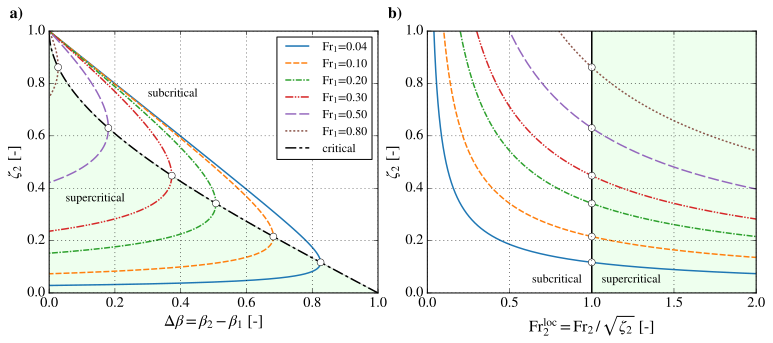

In [4]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.15 )

Fr = np.array( ( 0.04, 0.1, 0.2, 0.3, 0.5, 0.8 ) )

Fr_c = np.linspace( 0.0, 1.0, 100 )
ζ2 = np.linspace( .02, 1.0, 1000 )

for Fr1 in Fr:
  Δβ = func_Δβ( ζ2, Fr1 )
  Fr2 = Fr1 / ζ2
  ax1.plot( Δβ, ζ2, label='Fr$_1$=%.2f' % Fr1 )
  ax2.plot( Fr2/np.sqrt(ζ2), ζ2, label='Fr$_1$=%.2f' % Fr1 )


ζ2_cc = Fr_c**(2/3)
Δβ_cc  = Fr_c**2/2.0+1-3.0/2.0*Fr_c**(2.0/3.0)

ζ2_c = Fr**(2/3)
Δβ_c  = Fr**2/2.0+1-3.0/2.0*Fr**(2.0/3.0)

ax1.plot( Δβ_cc, ζ2_cc, 'k', label='critical' )
ax1.plot( Δβ_c, ζ2_c, 'o', markersize=7, markerfacecolor='w' )

ax1.set_xlabel( r'$\Delta\beta = \beta_2-\beta_1$ [-]' )
ax1.set_ylabel( r'$\zeta_2$ [-]' )
ax1.set_xlim( (0,1) )
ax1.legend(fontsize=12,handlelength=2.6)
ax1.fill_between(Δβ_cc, 0, ζ2_cc, facecolor = '#AAFFAA', alpha=0.2 )
ax1.grid()
ax1.text(-0.12, 1.05, 'a)', transform=ax1.transAxes, size=16, weight='semibold')
ax1.text(0.3, 0.75, 'subcritical', transform=ax1.transAxes)
ax1.text(0.05, 0.35, 'supercritical', transform=ax1.transAxes)

ax2.axvline(1,color='k', label='critical' )
ax2.plot( np.ones( Δβ_c.shape ), ζ2_c, 'o', markersize=7, markerfacecolor='w' )
ax2.set_xlabel( '$\mathrm{Fr}_2^\mathrm{loc}=\mathrm{Fr}_2\,/\,\sqrt{\zeta_2}$ [-]' )
ax2.set_ylabel( '$\zeta_2$ [-]' )
ax2.set_xlim( (0,2) )
ax2.axvspan( 1, 2, facecolor = '#AAFFAA', alpha=0.2 )
ax2.grid()
ax2.text(-0.12, 1.05, 'b)', transform=ax2.transAxes, size=16, weight='semibold');
ax2.text(0.47, 0.04, 'subcritical', transform=ax2.transAxes, horizontalalignment='right' )
ax2.text(0.53, 0.04, 'supercritical', transform=ax2.transAxes)

mpl.savefig( 'ChannelFlowOverHump.pdf', bbox_inches='tight', pad_inches=0.02);

## Flow through a constriction

In [5]:
def func_B( ζ2, Fr1 ):
  return Fr1 / ( ζ2 * np.sqrt( Fr1**2 + 2.0*(1.0-ζ2) ) )

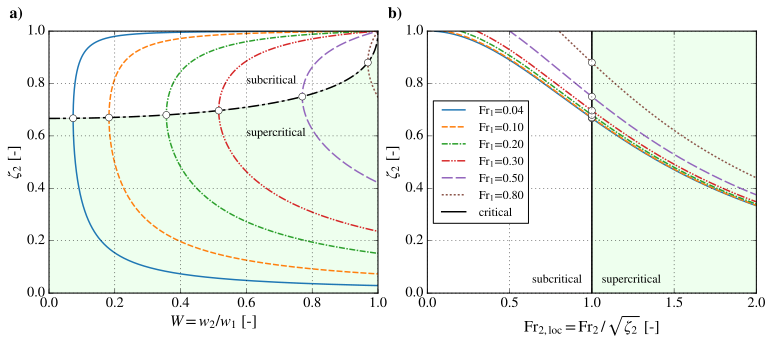

In [6]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.15 )

Fr = np.array( ( 0.04, 0.1, 0.2, 0.3, 0.5, 0.8 ) )

Fr_c = np.linspace( 0.0, 1.0, 100 )
ζ2 = np.linspace( .02, 1.0, 1000 )

for Fr1 in Fr:
  B = func_B( ζ2, Fr1 )
  Fr2 = Fr1 / ( B * ζ2 )
  ax1.plot( B, ζ2, label='Fr$_1$=%.2f' % Fr1 )
  ax2.plot( Fr2/np.sqrt(ζ2), ζ2, label='Fr$_1$=%.2f' % Fr1 )

ζ2_cc = 1.0/3.0 *(2.0 + Fr_c**2)
B_cc  = 3.0 * np.sqrt(3) * Fr_c / ( 2.0 + Fr_c**2 )**(3.0/2.0)

ζ2_c = 1.0/3.0 *(2.0 + Fr**2)
B_c  = 3.0 * np.sqrt(3) * Fr / ( 2.0 + Fr**2 )**(3.0/2.0)

ax1.plot( B_cc, ζ2_cc, 'k', label='critical' )
ax1.plot( B_c, ζ2_c, 'o', markersize=7, markerfacecolor='w' )

ax1.set_xlabel( '$W=w_2/w_1$ [-]' )
ax1.set_ylabel( '$\zeta_2$ [-]' )
ax1.set_xlim( (0,1) )
ax1.fill_between(B_cc, 0, ζ2_cc, facecolor = '#AAFFAA', alpha=0.2 )
ax1.grid()
ax1.text(-0.12, 1.05, 'a)', transform=ax1.transAxes, size=16, weight='semibold')
ax1.text(0.6, 0.8, 'subcritical', transform=ax1.transAxes)
ax1.text(0.6, 0.6, 'supercritical', transform=ax1.transAxes)

ax2.axvline(1,color='k', label='critical' )
ax2.plot( np.ones( B_c.shape ), ζ2_c, 'o', markersize=7, markerfacecolor='w' )
ax2.set_xlabel( '$\mathrm{Fr}_{2,\mathrm{loc}}=\mathrm{Fr}_2\,/\,\sqrt{\zeta_2}$ [-]' )
ax2.set_ylabel( '$\zeta_2$ [-]' )
ax2.set_xlim( (0,2) )
ax2.legend(loc='center left', fontsize=12,handlelength=2.6)
ax2.axvspan( 1, 2, facecolor = '#AAFFAA', alpha=0.2 )
ax2.grid()
ax2.text(-0.12, 1.05, 'b)', transform=ax2.transAxes, size=16, weight='semibold');
ax2.text(0.47, 0.04, 'subcritical', transform=ax2.transAxes, horizontalalignment='right' )
ax2.text(0.53, 0.04, 'supercritical', transform=ax2.transAxes)

mpl.savefig( 'ChannelFlowThroughConstriction.pdf', bbox_inches='tight', pad_inches=0.02);